<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%5BML%5D2_%ED%9A%8C%EA%B7%80%EC%8B%A4%EC%8A%B5_boston_housing_prices_(decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### http://chrisstrelioff.ws/sandbox/2015/06/25/decision_trees_in_python_again_cross_validation.html

## 보스턴 주택 가격 정보 예측하기 - Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### Training Set 로딩

In [3]:
boston = pd.read_csv("/content/BostonHousing.csv")

In [4]:
X = boston.drop('medv', axis = 1)
Y = boston['medv']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


### 모델 학습하기

In [8]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

parameters = {
    'max_depth':(1,2,3,4,5,6,7,8,9,10), #트리의 최대깊이
    'min_samples_split': [2, 10, 20], #노드를 분할하기위해 필요한 최소 샘플수
    'min_samples_leaf': [1, 5, 10], # 리프노드가 되기위해 필요한 최소 샘플수
    'max_leaf_nodes': [5, 10, 20],  #트리가 가질수있는 리프노드의 최대개수
}

In [9]:
from sklearn.model_selection import GridSearchCV
# scoring 은 높게 나올수록 좋
regressors = GridSearchCV(regressor, parameters, cv=5, scoring='neg_mean_squared_error')

In [10]:
regressors.fit(X_train, Y_train)
# pick the best
reg = regressors.best_estimator_

### Model Validation

In [11]:
import matplotlib.pyplot as plt

Y_pred = reg.predict(X_test)

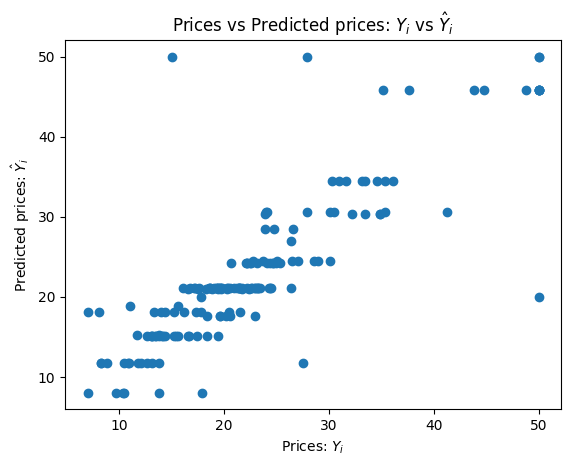

In [12]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

27.859187400697156


28.53 -> Linear Regression

27. 85 -> DT

DT 가 성능이 좀더 좋으머

RMSE

In [15]:
from math import sqrt

sqrt(mse)

5.27818031149914

In [16]:
print(Y_test[:5])
print(Y_pred[:5])

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
Name: medv, dtype: float64
[45.83157895 30.63684211 21.11956522  8.04615385 45.83157895]


DT 모델 확인하기

In [19]:
from sklearn import tree
# 디렉토리에 정보들 들어감
dotfile = open("boston_housing_dt.dot", 'w')
tree.export_graphviz(reg, out_file = dotfile, feature_names = X_train.columns)
dotfile.close()

### 위의 boston_housing_dt.dot파일의 내용을 복사해서 http://webgraphviz.com/ 시각화

In [18]:
!cat boston_housing_dt.dot


digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="rm <= 6.974\nsquared_error = 79.826\nsamples = 339\nvalue = 22.537"] ;
1 [label="lstat <= 14.405\nsquared_error = 40.696\nsamples = 294\nvalue = 20.215"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
3 [label="dis <= 1.434\nsquared_error = 25.302\nsamples = 178\nvalue = 23.571"] ;
1 -> 3 ;
7 [label="squared_error = 0.0\nsamples = 2\nvalue = 50.0"] ;
3 -> 7 ;
8 [label="rm <= 6.543\nsquared_error = 17.563\nsamples = 176\nvalue = 23.271"] ;
3 -> 8 ;
9 [label="lstat <= 7.57\nsquared_error = 9.195\nsamples = 134\nvalue = 21.781"] ;
8 -> 9 ;
21 [label="squared_error = 3.272\nsamples = 30\nvalue = 24.237"] ;
9 -> 21 ;
22 [label="tax <= 208.0\nsquared_error = 8.663\nsamples = 104\nvalue = 21.073"] ;
9 -> 22 ;
25 [label="squared_error = 40.322\nsamples = 4\nvalue = 27.025"] ;
22 -> 25 ;
26 [label="ptratio <= 20.95\nsquared_error = 5.923\nsamples = 100\nvalue = 20.835"] ;
22 -> 26 ;


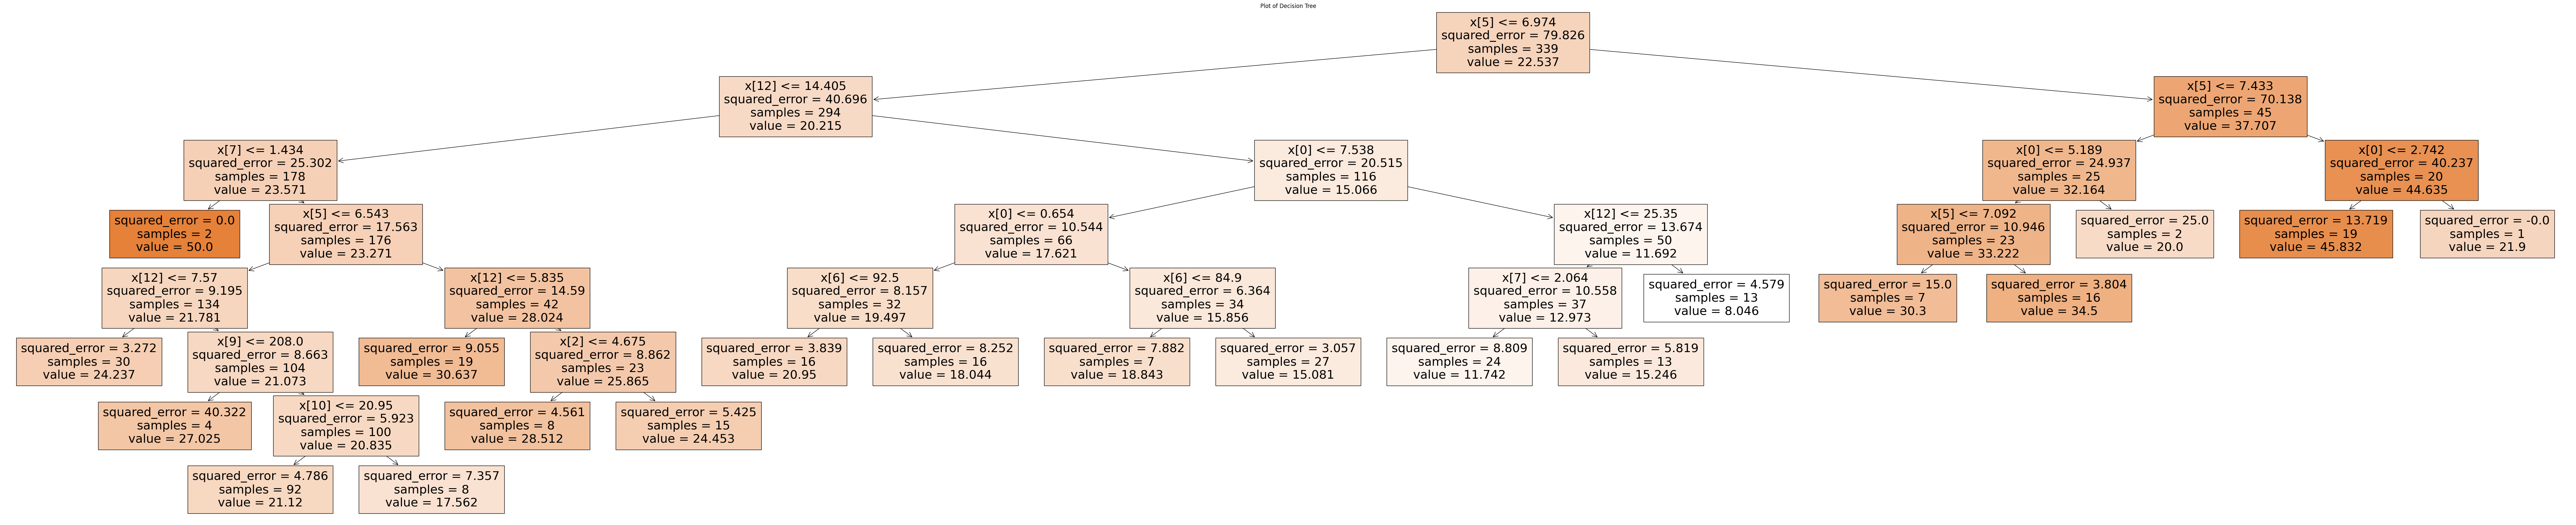

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(100, 20))
plot_tree(reg, filled=True,
   )
plt.title("Plot of Decision Tree")
plt.show()